In [128]:
import os
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Reading in data

In [2]:
geogon_od = pd.read_csv('geogon_od.csv')

In [4]:
geogon_od.head()

,Year,FIPS,State,County,Deaths,Population,Crude Rate,Cruder Rate,Deathrate per 100,Unemployment_rate,...,H_FEMALE,Urbanicity,Jail Population,Incarceration Rate per 100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry
0,1999.0,1003,Alabama,"Baldwin County, AL",11.0,137555.0,Unreliable,7.996801,0.007997,NaN,...,NaN,small/mid,390.0,440.34,14668.0,10.5,39194.0,30.659218,-87.746067,"POLYGON ((-88.026319 30.753358, -87.944546 30...."
1,1999.0,1073,Alabama,"Jefferson County, AL",34.0,662845.0,5.13,5.129404,0.005129,NaN,...,NaN,urban,1779.0,408.23,89661.0,13.7,35885.0,33.553444,-86.896536,"POLYGON ((-87.26692299999999 33.512929, -87.27..."
2,1999.0,1089,Alabama,"Madison County, AL",10.0,274693.0,Unreliable,3.640428,0.003640,NaN,...,NaN,small/mid,713.0,382.13,30056.0,11.1,43718.0,34.764238,-86.551080,"POLYGON ((-86.78362801716901 34.991924921992, ..."
3,1999.0,1097,Alabama,"Mobile County, AL",28.0,399323.0,7.01,7.011868,0.007012,NaN,...,NaN,small/mid,1223.0,470.21,72372.0,18.3,32396.0,30.684572,-88.196568,"POLYGON ((-88.432007 31.114297999999998, -88.3..."
4,1999.0,2020,Alaska,"Anchorage Borough, AK",21.0,259348.0,8.10,8.097228,0.008097,NaN,...,NaN,small/mid,NaN,NaN,18397.0,7.2,52959.0,61.174250,-149.284329,"POLYGON ((-150.228774 61.162580999999996, -150..."


In [5]:
# Convert FIPS to string 
geogon_od['FIPS'] = geogon_od['FIPS'].astype(str).str.zfill(5) 
geogon_od.head()

,Year,FIPS,State,County,Deaths,Population,Crude Rate,Cruder Rate,Deathrate per 100,Unemployment_rate,...,H_FEMALE,Urbanicity,Jail Population,Incarceration Rate per 100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry
0,1999.0,01003,Alabama,"Baldwin County, AL",11.0,137555.0,Unreliable,7.996801,0.007997,NaN,...,NaN,small/mid,390.0,440.34,14668.0,10.5,39194.0,30.659218,-87.746067,"POLYGON ((-88.026319 30.753358, -87.944546 30...."
1,1999.0,01073,Alabama,"Jefferson County, AL",34.0,662845.0,5.13,5.129404,0.005129,NaN,...,NaN,urban,1779.0,408.23,89661.0,13.7,35885.0,33.553444,-86.896536,"POLYGON ((-87.26692299999999 33.512929, -87.27..."
2,1999.0,01089,Alabama,"Madison County, AL",10.0,274693.0,Unreliable,3.640428,0.003640,NaN,...,NaN,small/mid,713.0,382.13,30056.0,11.1,43718.0,34.764238,-86.551080,"POLYGON ((-86.78362801716901 34.991924921992, ..."
3,1999.0,01097,Alabama,"Mobile County, AL",28.0,399323.0,7.01,7.011868,0.007012,NaN,...,NaN,small/mid,1223.0,470.21,72372.0,18.3,32396.0,30.684572,-88.196568,"POLYGON ((-88.432007 31.114297999999998, -88.3..."
4,1999.0,02020,Alaska,"Anchorage Borough, AK",21.0,259348.0,8.10,8.097228,0.008097,NaN,...,NaN,small/mid,NaN,NaN,18397.0,7.2,52959.0,61.174250,-149.284329,"POLYGON ((-150.228774 61.162580999999996, -150..."


# Data Cleaning

## Imputing `Incarceration Rate per 100k` and `Jail Population` data

In [6]:
# Get 2019 and 2018 incarceration columns 
incar19 = geogon_od[geogon_od['Year'] == 2019][['FIPS', 'Incarceration Rate per 100k']]
incar18 = geogon_od[geogon_od['Year'] == 2018][['FIPS', 'Incarceration Rate per 100k']]

# Merge 2018 rates to 2019 counties 
incar19 = incar19.merge(incar18, on = ['FIPS'], how = 'left')
incar19 = incar19.drop('Incarceration Rate per 100k_x', axis = 1)

# Place 2019's new rate back into df 
geogon_od.loc[geogon_od['Year'] == 2019, 'Incarceration Rate per 100k'] = np.array(incar19['Incarceration Rate per 100k_y'])
geogon_od[geogon_od['Year'] == 2019]['Incarceration Rate per 100k']

13755     477.31
13756     369.20
13757     673.96
13758     676.19
13759     523.14
13760        NaN
13761     891.10
13762    1452.59
13763     553.39
13764     382.07
13765     514.18
13766     384.43
13767     371.30
13768     527.82
13769      60.06
13770     525.86
13771     861.76
13772     712.70
13773     393.51
13774     373.05
13775     399.72
13776     712.67
13777        NaN
13778        NaN
13779      50.87
13780       4.25
13781     266.73
13782     473.77
13783     470.85
13784     459.11
13785     263.37
13786     468.52
13787     408.99
13788     282.76
13789     182.36
13790     439.17
13791     355.42
13792     307.74
13793     227.36
13794     338.43
13795     762.94
13796     259.70
13797     418.72
13798     238.66
13799     516.16
13800     407.81
13801        NaN
13802     221.81
13803        NaN
13804     373.92
13805        NaN
13806     192.55
13807     331.05
13808     477.11
13809     440.43
13810     457.52
13811     346.92
13812     555.86
13813     798.

In [8]:
geogon_od.head()

,Year,FIPS,State,County,Deaths,Population,Crude Rate,Cruder Rate,Deathrate per 100,Unemployment_rate,...,H_FEMALE,Urbanicity,Jail Population,Incarceration Rate per 100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry
0,1999.0,01003,Alabama,"Baldwin County, AL",11.0,137555.0,Unreliable,7.996801,0.007997,NaN,...,NaN,small/mid,390.0,440.34,14668.0,10.5,39194.0,30.659218,-87.746067,"POLYGON ((-88.026319 30.753358, -87.944546 30...."
1,1999.0,01073,Alabama,"Jefferson County, AL",34.0,662845.0,5.13,5.129404,0.005129,NaN,...,NaN,urban,1779.0,408.23,89661.0,13.7,35885.0,33.553444,-86.896536,"POLYGON ((-87.26692299999999 33.512929, -87.27..."
2,1999.0,01089,Alabama,"Madison County, AL",10.0,274693.0,Unreliable,3.640428,0.003640,NaN,...,NaN,small/mid,713.0,382.13,30056.0,11.1,43718.0,34.764238,-86.551080,"POLYGON ((-86.78362801716901 34.991924921992, ..."
3,1999.0,01097,Alabama,"Mobile County, AL",28.0,399323.0,7.01,7.011868,0.007012,NaN,...,NaN,small/mid,1223.0,470.21,72372.0,18.3,32396.0,30.684572,-88.196568,"POLYGON ((-88.432007 31.114297999999998, -88.3..."
4,1999.0,02020,Alaska,"Anchorage Borough, AK",21.0,259348.0,8.10,8.097228,0.008097,NaN,...,NaN,small/mid,NaN,NaN,18397.0,7.2,52959.0,61.174250,-149.284329,"POLYGON ((-150.228774 61.162580999999996, -150..."


In [9]:
# Get 2019 and 2018 jail population columns 
jpop19 = geogon_od[geogon_od['Year'] == 2019][['FIPS', 'Jail Population']]
jpop18 = geogon_od[geogon_od['Year'] == 2018][['FIPS', 'Jail Population']]

# Merge 2018 rates to 2019 counties 
jpop19 = jpop19.merge(jpop18, on = ['FIPS'], how = 'left')
jpop19 = jpop19.drop('Jail Population_x', axis = 1)

# Place 2019's new rate back into df 
geogon_od.loc[geogon_od['Year'] == 2019, 'Jail Population'] = np.array(jpop19['Jail Population_y'])
geogon_od[geogon_od['Year'] == 2019]['Jail Population']

13755      643.00
13756      134.00
13757      497.00
13758      355.00
13759      235.00
13760         NaN
13761      208.00
13762      945.00
13763      367.00
13764     1639.00
13765      303.00
13766      443.00
13767      911.00
13768      315.00
13769      160.00
13770      775.00
13771      654.00
13772      269.00
13773      225.00
13774      527.00
13775      578.00
13776      283.00
13777         NaN
13778         NaN
13779       19.00
13780        3.00
13781      202.00
13782      476.00
13783      138.00
13784      111.00
13785     7553.00
13786      546.00
13787      269.00
13788     1849.00
13789      496.00
13790      561.00
13791      453.00
13792      543.00
13793      194.00
13794      200.00
13795      335.00
13796      125.00
13797     1068.00
13798      183.00
13799      423.00
13800      655.00
13801         NaN
13802     2548.00
13803         NaN
13804      560.00
13805         NaN
13806     1455.00
13807      396.00
13808     3029.00
13809      397.00
13810     

## Quantifying and imputing the `Urbanicity` column

In [10]:
geogon_od['Urbanicity'].unique()

array(['small/mid', 'urban', 'rural', 'suburban', nan], dtype=object)

In [11]:
# replacing urbanicity values with ordinal values
urban_dict = {'rural' : 1, 'small/mid' : 2, 'suburban': 3, 'urban' : 4}
geogon_od = geogon_od.replace({"Urbanicity": urban_dict})
geogon_od['Urbanicity']

0        2.0
1        4.0
2        2.0
3        2.0
4        2.0
5        2.0
6        2.0
7        4.0
8        1.0
9        2.0
10       3.0
11       2.0
12       2.0
13       4.0
14       2.0
15       3.0
16       3.0
17       2.0
18       1.0
19       2.0
20       2.0
21       2.0
22       4.0
23       2.0
24       3.0
25       1.0
26       2.0
27       2.0
28       1.0
29       4.0
30       3.0
31       4.0
32       4.0
33       3.0
34       4.0
35       4.0
36       2.0
37       2.0
38       3.0
39       2.0
40       4.0
41       2.0
42       2.0
43       2.0
44       2.0
45       2.0
46       2.0
47       2.0
48       2.0
49       3.0
50       3.0
51       2.0
52       4.0
53       2.0
54       3.0
55       2.0
56       2.0
57       2.0
58       2.0
59       4.0
60       1.0
61       3.0
62       2.0
63       2.0
64       2.0
65       3.0
66       4.0
67       2.0
68       2.0
69       2.0
70       3.0
71       3.0
72       4.0
73       2.0
74       4.0
75       2.0
76       2.0

In [12]:
# looking at counts of NAs for each county
geogon_od[geogon_od['Urbanicity'].isnull()][['County']].value_counts()

County                          
Bronx County, NY                    22
Kings County, NY                    22
Queens County, NY                   22
Richmond County, NY                 22
Columbia County, WI                  2
Norfolk County, MA                   2
Hillsborough County, NH              2
Georgetown County, SC                2
Newport News city, VA                2
Newport County, RI                   2
Rankin County, MS                    2
Crawford County, OH                  2
New London County, CT                2
Stafford County, VA                  2
Columbiana County, OH                2
Pittsylvania County, VA              2
Kootenai County, ID                  2
New Haven County, CT                 2
Stark County, OH                     2
Gila County, AZ                      2
Geauga County, OH                    2
St. Francois County, MO              2
Hoke County, NC                      2
St. Charles County, MO               2
Dare County, NC                

In [20]:
# Replacing the urbanicity for these NY counties with 4 - urban
geogon_od.loc[(geogon_od['Urbanicity'].isnull()) & (geogon_od['County'] == 'Bronx County, NY'), 'Urbanicity'] = 4
geogon_od.loc[(geogon_od['Urbanicity'].isnull()) & (geogon_od['County'] == 'Kings County, NY'), 'Urbanicity'] = 4
geogon_od.loc[(geogon_od['Urbanicity'].isnull()) & (geogon_od['County'] == 'Queens County, NY'), 'Urbanicity'] = 4
geogon_od.loc[(geogon_od['Urbanicity'].isnull()) & (geogon_od['County'] == 'Richmond County, NY'), 'Urbanicity'] = 4

In [47]:
# note that the years that having missing values are only 2019 and 2020
geogon_od[geogon_od['Urbanicity'].isnull()][['Year']].value_counts()

Year  
2019.0    978
2020.0    384
dtype: int64

In [46]:
# create a list of all the missing counties' fips code
urban_countyna = list()

for i in geogon_od[geogon_od['Urbanicity'].isnull()][['FIPS']].value_counts().index:
    urban_countyna.append(i[0])

In [41]:
incar = pd.read_csv('incarceration.csv')

In [96]:
# make fips 5 number strings
incar['fips'] = incar['fips'].astype(str).str.zfill(5) 

# replace with ordinal urbanicity
incar = incar.replace({"urbanicity": urban_dict})

In [88]:
# fill in missing urbanicity with the urbanicity of the most recent non-NA year
for fips in urban_countyna:
    if fips in incar['fips'].values:
        past_urban = incar.loc[(incar['fips'] == fips), 'urbanicity'].iloc[-1]
        geogon_od.loc[(geogon_od['Urbanicity'].isnull()) & (geogon_od['FIPS'] == fips), 'Urbanicity'] = past_urban

## Imputing the `Jail Population`  and `Incarceration per 100k` column

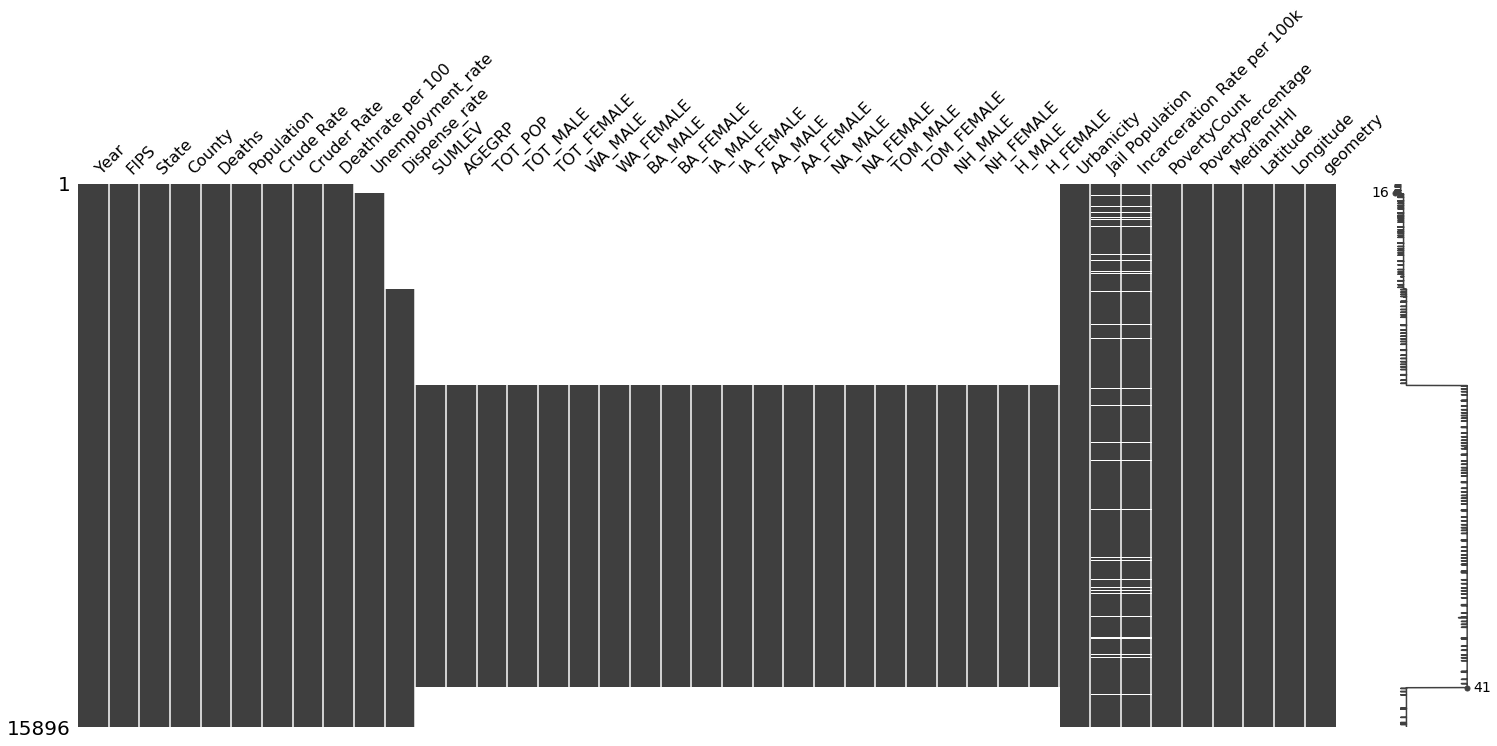

In [103]:
msno.matrix(geogon_od);

In [99]:
# create a list of all the missing counties' fips code
jail_countyna = list()
incar_countyna = list()

for i in geogon_od[geogon_od['Jail Population'].isnull()][['FIPS']].value_counts().index:
    jail_countyna.append(i[0])
    
for i in geogon_od[geogon_od['Incarceration Rate per 100k'].isnull()][['FIPS']].value_counts().index:
    incar_countyna.append(i[0])

In [101]:
# fill in missing jail population with the urbanicity of the most recent non-NA year
for fips in jail_countyna:
    if fips in incar['fips'].values:
        past_jail = incar.loc[(incar['fips'] == fips), 'total_jail_pop'].iloc[-1]
        geogon_od.loc[(geogon_od['Jail Population'].isnull()) & (geogon_od['FIPS'] == fips), 'Jail Population'] = past_jail

In [102]:
# fill in missing incarceration rate with the urbanicity of the most recent non-NA year
for fips in incar_countyna:
    if fips in incar['fips'].values:
        past_incar = incar.loc[(incar['fips'] == fips), 'total_jail_pop_rate'].iloc[-1]
        geogon_od.loc[(geogon_od['Incarceration Rate per 100k'].isnull()) & (geogon_od['FIPS'] == fips), 'Incarceration Rate per 100k'] = past_incar

## Log transform the reponse variable

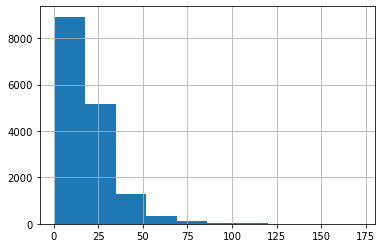

In [119]:
geogon_od['Cruder Rate'].hist();

In [113]:
geogon_od['log_Cruder_Rate'] = np.log(geogon_od['Cruder Rate'])

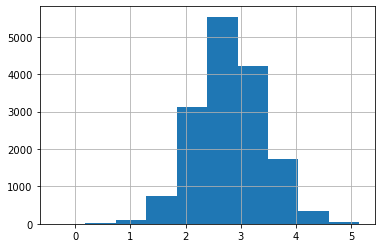

In [118]:
geogon_od['log_Cruder_Rate'].hist();

# Write to .csv

In [122]:
geogon_od.to_csv('geogon_od_cleaned.csv', index = False)

In [129]:
geogon_od.head()

,Year,FIPS,State,County,Deaths,Population,Crude Rate,Cruder Rate,Deathrate per 100,Unemployment_rate,Dispense_rate,SUMLEV,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,NH_MALE,NH_FEMALE,H_MALE,H_FEMALE,Urbanicity,Jail Population,Incarceration Rate per 100k,PovertyCount,PovertyPercentage,MedianHHI,Latitude,Longitude,geometry,log_Cruder_Rate
0,1999.0,01003,Alabama,"Baldwin County, AL",11.0,137555.0,Unreliable,7.996801,0.007997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,390.0,440.34,14668.0,10.5,39194.0,30.659218,-87.746067,"POLYGON ((-88.026319 30.753358, -87.944546 30....",2.079042
1,1999.0,01073,Alabama,"Jefferson County, AL",34.0,662845.0,5.13,5.129404,0.005129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1779.0,408.23,89661.0,13.7,35885.0,33.553444,-86.896536,"POLYGON ((-87.26692299999999 33.512929, -87.27...",1.634990
2,1999.0,01089,Alabama,"Madison County, AL",10.0,274693.0,Unreliable,3.640428,0.003640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,713.0,382.13,30056.0,11.1,43718.0,34.764238,-86.551080,"POLYGON ((-86.78362801716901 34.991924921992, ...",1.292101
3,1999.0,01097,Alabama,"Mobile County, AL",28.0,399323.0,7.01,7.011868,0.007012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1223.0,470.21,72372.0,18.3,32396.0,30.684572,-88.196568,"POLYGON ((-88.432007 31.114297999999998, -88.3...",1.947604
4,1999.0,02020,Alaska,"Anchorage Borough, AK",21.0,259348.0,8.10,8.097228,0.008097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,18397.0,7.2,52959.0,61.174250,-149.284329,"POLYGON ((-150.228774 61.162580999999996, -150...",2.091522
